In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
from google.colab import files
uploaded = files.upload()

Saving application_data.csv to application_data (1).csv


In [127]:
data = pd.read_csv('application_data.csv')
data.shape

(83572, 122)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83572 entries, 0 to 83571
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(85), int64(21), object(16)
memory usage: 77.8+ MB


In [140]:
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
# getting idea of the datatypes in the dataframe
data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

**DATA CLEANING**

In [131]:
# Getting the percentage of null values in each column
print(data.isnull().sum()/len(data)*100)

SK_ID_CURR                     0.00000
TARGET                         0.00000
NAME_CONTRACT_TYPE             0.00000
CODE_GENDER                    0.00000
FLAG_OWN_CAR                   0.00000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     13.37649
AMT_REQ_CREDIT_BUREAU_WEEK    13.37649
AMT_REQ_CREDIT_BUREAU_MON     13.37649
AMT_REQ_CREDIT_BUREAU_QRT     13.37649
AMT_REQ_CREDIT_BUREAU_YEAR    13.37649
Length: 122, dtype: float64


In [14]:
# Finding columns having greater than 30% null values

nullcol = data.isnull().sum()/len(data)*100
nullcol = nullcol[nullcol.values>30.0]
print(nullcol)
len(nullcol)

OWN_CAR_AGE                     65.971857
OCCUPATION_TYPE                 31.313119
EXT_SOURCE_1                    56.441153
APARTMENTS_AVG                  50.747858
BASEMENTAREA_AVG                58.440626
YEARS_BEGINEXPLUATATION_AVG     48.778299
YEARS_BUILD_AVG                 66.410999
COMMONAREA_AVG                  69.755420
ELEVATORS_AVG                   53.332456
ENTRANCES_AVG                   50.349399
FLOORSMAX_AVG                   49.751113
FLOORSMIN_AVG                   67.745178
LANDAREA_AVG                    59.310535
LIVINGAPARTMENTS_AVG            68.286029
LIVINGAREA_AVG                  50.236921
NONLIVINGAPARTMENTS_AVG         69.291150
NONLIVINGAREA_AVG               55.106974
APARTMENTS_MODE                 50.747858
BASEMENTAREA_MODE               58.440626
YEARS_BEGINEXPLUATATION_MODE    48.778299
YEARS_BUILD_MODE                66.410999
COMMONAREA_MODE                 69.755420
ELEVATORS_MODE                  53.332456
ENTRANCES_MODE                  50

50

In [ ]:
# Removing above 50 columns
nullcol = list(nullcol[nullcol.values>=30.0].index)
data.drop(labels=nullcol, axis=1, inplace=True)
print(len(nullcol))

In [16]:
# Checking the columns having less null percentage

data.isnull().sum()/len(data)*100

SK_ID_CURR                     0.00000
TARGET                         0.00000
NAME_CONTRACT_TYPE             0.00000
CODE_GENDER                    0.00000
FLAG_OWN_CAR                   0.00000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     13.37649
AMT_REQ_CREDIT_BUREAU_WEEK    13.37649
AMT_REQ_CREDIT_BUREAU_MON     13.37649
AMT_REQ_CREDIT_BUREAU_QRT     13.37649
AMT_REQ_CREDIT_BUREAU_YEAR    13.37649
Length: 72, dtype: float64

We can see that we have some null values in the columns. All of these values are less than 30%

**Analysis of few comlumns and if null value replacement is required or not**

1. Starting with AMT_ANNUITY

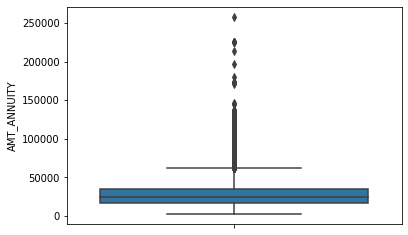

In [17]:
# Box plotting the values of AMT_ANNUITY
sns.boxplot(y=data['AMT_ANNUITY'])


From the boxplot we can see that there are several outliers and the difference between max and min is quite severe. So we are taking median values to replace those null values.


In [18]:
# Filling missing values with median

missingValuesFill = data['AMT_ANNUITY'].median()
data['AMT_ANNUITY'].fillna(value = missingValuesFill, inplace=True)


**2. Analysis of CNT_FAM_MEMBERS**

In [19]:
data['CNT_FAM_MEMBERS'].value_counts(dropna = False)

2.0     43273
1.0     18229
3.0     14281
4.0      6637
5.0       996
6.0       116
7.0        25
8.0         8
9.0         2
10.0        2
13.0        1
NaN         1
14.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

<function matplotlib.pyplot.show>

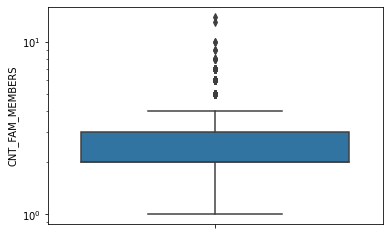

In [20]:
# Plotting the data from the CNT_FAM_MEMBERS column in a box plot to detect outliers

sns.boxplot(y = data['CNT_FAM_MEMBERS'])
plt.yscale('log')
plt.show

In [21]:
# Filling missing values with median
missingValuesFill = data['CNT_FAM_MEMBERS'].median()
data['CNT_FAM_MEMBERS'].fillna(value = missingValuesFill, inplace = True)

Explanation: From the boxPlot we can see that there are seven outliners and their is quite a difference between 75% and max .So we are taking median value to replace those null values

**Analysis of Code Gender**

In [22]:
data['CODE_GENDER'].value_counts(dropna=False)

# We can see that Female F is having the majority and only 4 rows are having XNA values. So, there wont be any major impact in the dataset if we can update those columns with Gender 'F'.

F      55020
M      28549
XNA        3
Name: CODE_GENDER, dtype: int64

In [23]:
# Replacing XNA with F

data.loc[data['CODE_GENDER']=='XNA', 'CODE_GENDER'] = 'F'
data['CODE_GENDER'].value_counts()

F    55023
M    28549
Name: CODE_GENDER, dtype: int64

**ANALYSIS OF ORGANIZATION_TYPE**

In [24]:
data['ORGANIZATION_TYPE'].value_counts(dropna = False)

Business Entity Type 3    18448
XNA                       14951
Self-employed             10398
Other                      4573
Medicine                   3047
Business Entity Type 2     2867
Government                 2856
School                     2448
Trade: type 7              2079
Kindergarten               1840
Construction               1775
Business Entity Type 1     1624
Transport: type 4          1445
Trade: type 3               917
Industry: type 9            915
Security                    907
Industry: type 3            903
Housing                     813
Industry: type 11           782
Bank                        733
Military                    729
Agriculture                 629
Police                      618
Transport: type 2           616
Postal                      610
Security Ministries         560
Trade: type 2               520
Restaurant                  499
Services                    457
Industry: type 7            361
University                  347
Transpor

In [25]:
print(data['ORGANIZATION_TYPE'].mode())
print(data['ORGANIZATION_TYPE'].describe())

0    Business Entity Type 3
dtype: object
count                      83572
unique                        58
top       Business Entity Type 3
freq                       18448
Name: ORGANIZATION_TYPE, dtype: object


**There are 55374 rows wit XNA value which is 18% of the total count. So we can discard them.**

**ANALYSIS OF AMT_GOODS_PRICE**

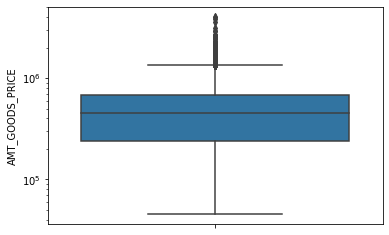

In [26]:
# Box plotting the values of AMT_GOODS_PRICE
sns.boxplot(y = data['AMT_GOODS_PRICE'])
plt.yscale('log')
plt.show()

In [27]:
print(data['AMT_GOODS_PRICE'].describe())
print(data['AMT_GOODS_PRICE'].median())
print(data['AMT_GOODS_PRICE'].mean())
print(data['AMT_GOODS_PRICE'].max())
print(data['AMT_GOODS_PRICE'].min())

count    8.350500e+04
mean     5.379092e+05
std      3.687517e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
450000.0
537909.1656547512
4050000.0
45000.0


**so as we are not getting any clear understanding of the data , so we would keep the null values**

**Analysis of AMT_REQ_CREDIT_BUREAU_DAY**

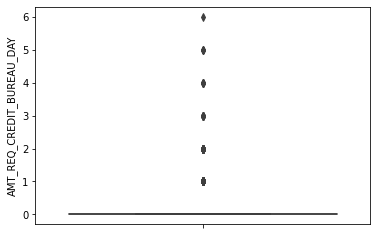

In [28]:
sns.boxplot(y=data['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

In [29]:
print(data['AMT_REQ_CREDIT_BUREAU_DAY'].describe())

count    72393.000000
mean         0.007335
std          0.106501
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


As we can see the numerical column AMT_REQ_CREDIT_BUREAU_DAY has outliers so they need to be removed or capped.Also for missing value fillup we need to use the median in this case.

**HANDLING OUTLIERS**

In [30]:
# Removing outliers for the column below
outliers=['AMT_REQ_CREDIT_BUREAU_DAY']
for col in outliers:
    percentiles = data[col].quantile([0.01,0.99]).values
    data[col][data[col] <= percentiles[0]] = percentiles[0]
    data[col][data[col] >= percentiles[1]] = percentiles[1]


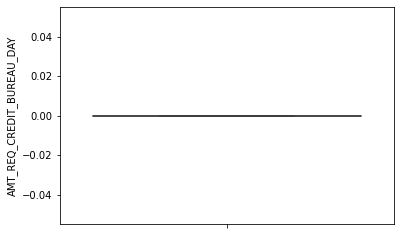

In [31]:
sns.boxplot(y=data['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

**CHANGING THE DATATYPES OF THE REQUIRED COLUMNS**

In [32]:
data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

data[numeric_columns]=data[numeric_columns].apply(pd.to_numeric)
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 72, dtype: object

In [35]:
data.shape

(83572, 72)

**Derived Metrics**

Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [36]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

data['AMT_INCOME_RANGE']=pd.cut(data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [37]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

data['AMT_CREDIT_RANGE']=pd.cut(data['AMT_CREDIT'],bins=bins,labels=slots)

In [38]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0 = data.loc[data["TARGET"]==0]
target1 = data.loc[data["TARGET"]==1]

In [39]:
# Calculating Imbalance percentage
    
round(len(target0)/len(target1),2)

11.41

### **Univariate analysis for categories**


In [40]:
# reusable ploting function

def plotfunc(df,col,title,hue =None):
    
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    fig, ax = plt.subplots()
    temp = pd.Series(data = hue)
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()
    

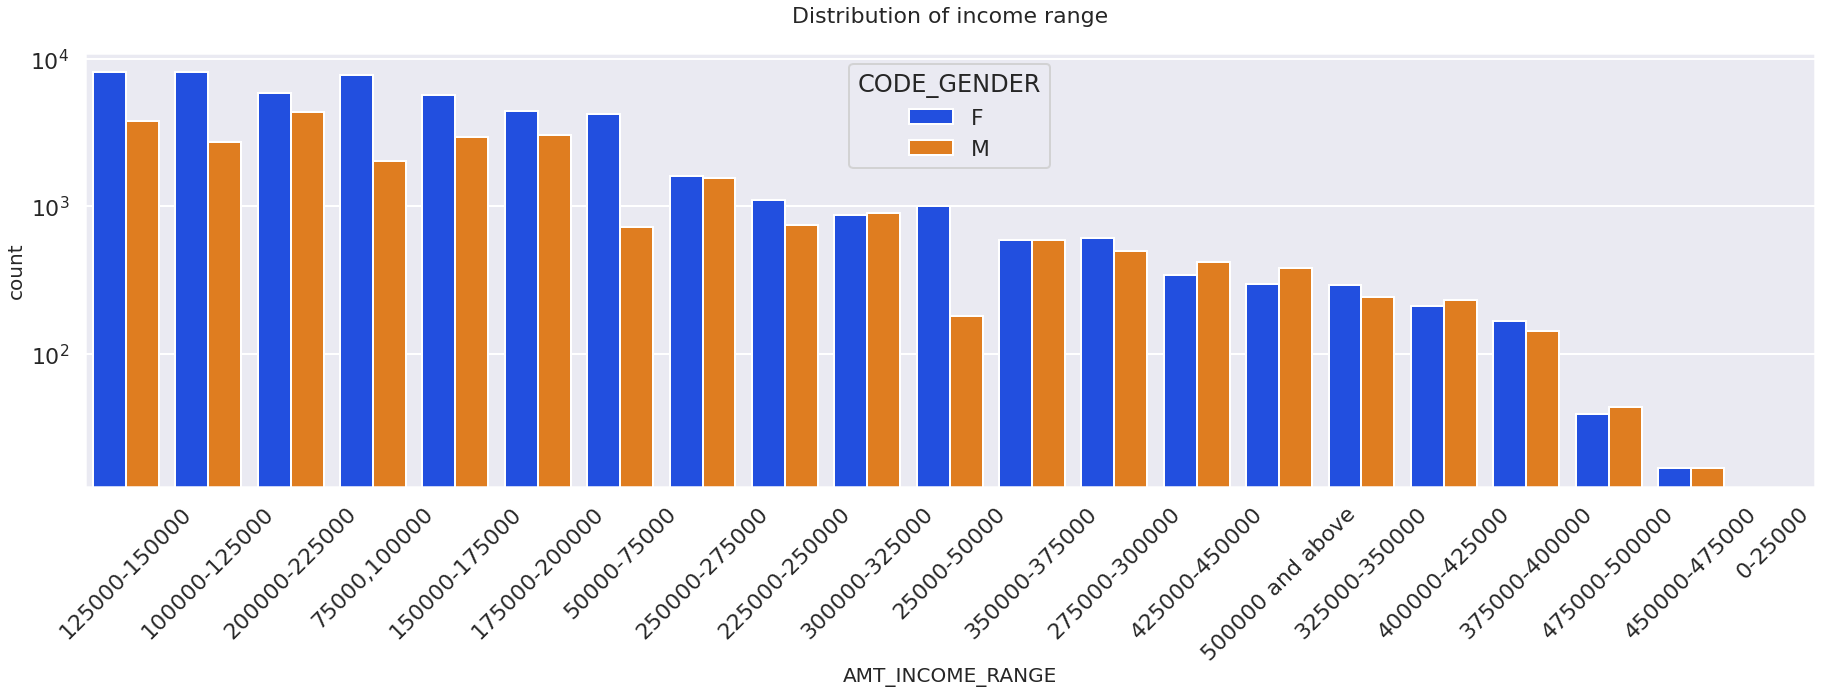

In [41]:
# PLotting for income range

plotfunc(target0,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

**Points to be concluded from the above graph.**

1. Female counts are higher than male.

2. Income range from 100000 to 200000 is having more number of credits.

3. This graph show that females are more than male in having credits for that range.

4. Very less count for income range 400000 and above.

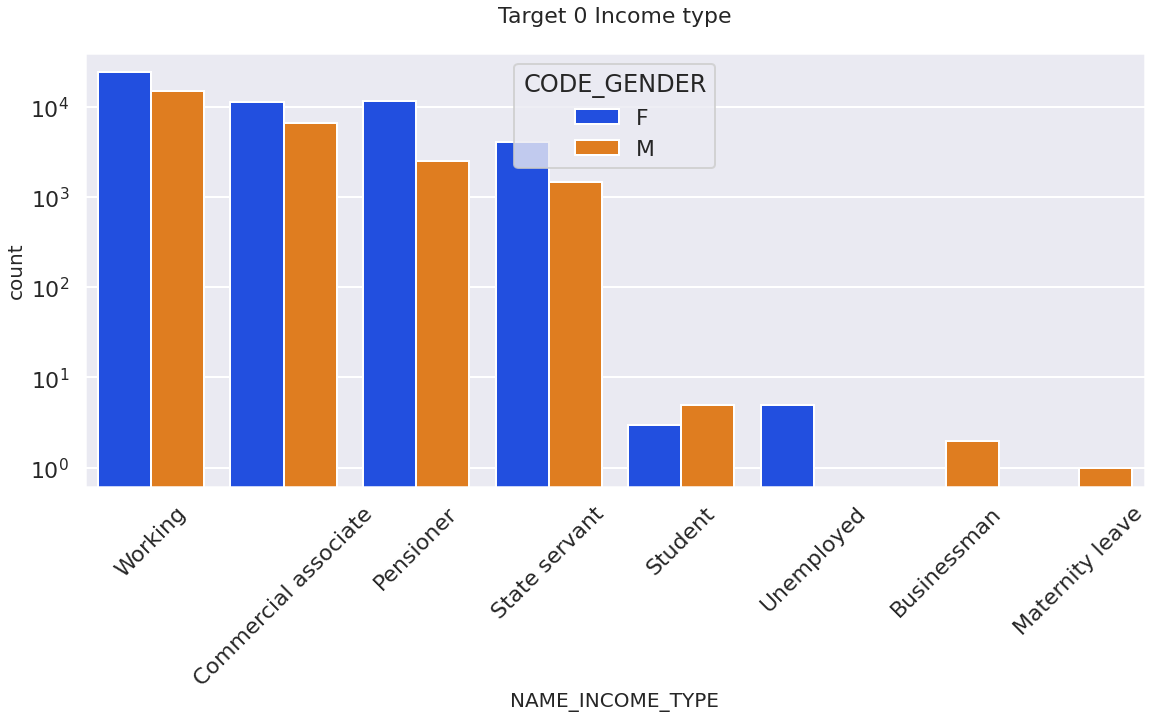

In [42]:
# Plotting for Income type for target 0

plotfunc(target0,col='NAME_INCOME_TYPE',title='Target 0 Income type',hue='CODE_GENDER')

**Points to be concluded from the above graph for target =0(Non- Defaulters).**

Female are having more credit than males

High number of credit for income type working , commercial associate , pensioner and state servant.

Low number of credit for income type student ,unemployed, businessman and maternity leave.

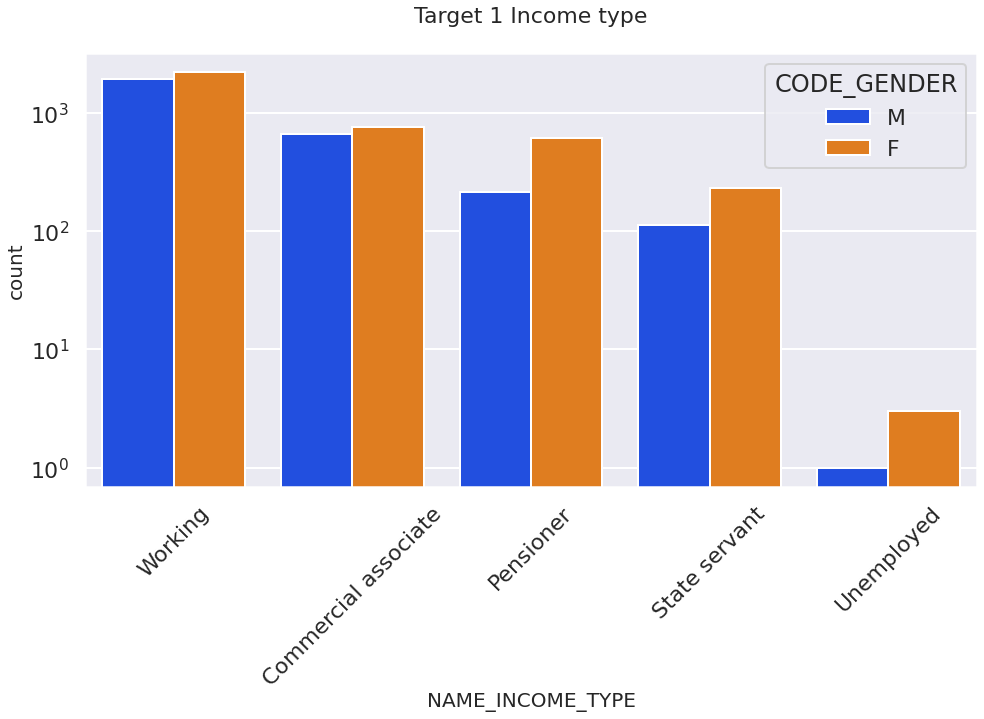

In [43]:
# Plotting for Income type for target1

plotfunc(target1,col='NAME_INCOME_TYPE',title='Target 1 Income type',hue='CODE_GENDER')

**Points to be concluded from the above graph.**

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

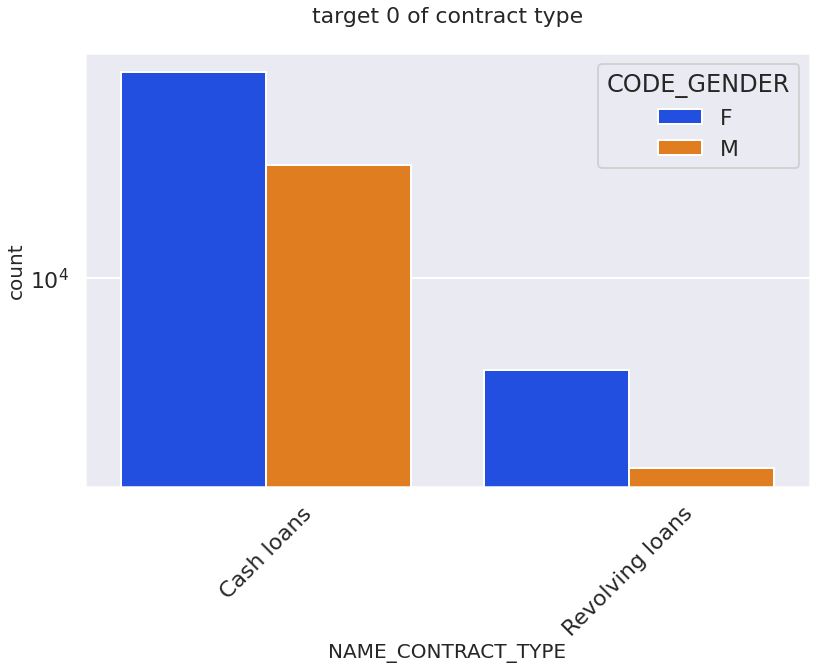

In [44]:
# Plotting for Contract type

plotfunc(target0,col='NAME_CONTRACT_TYPE',title='target 0 of contract type',hue='CODE_GENDER')

**Points to be concluded from the above graph.**

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.

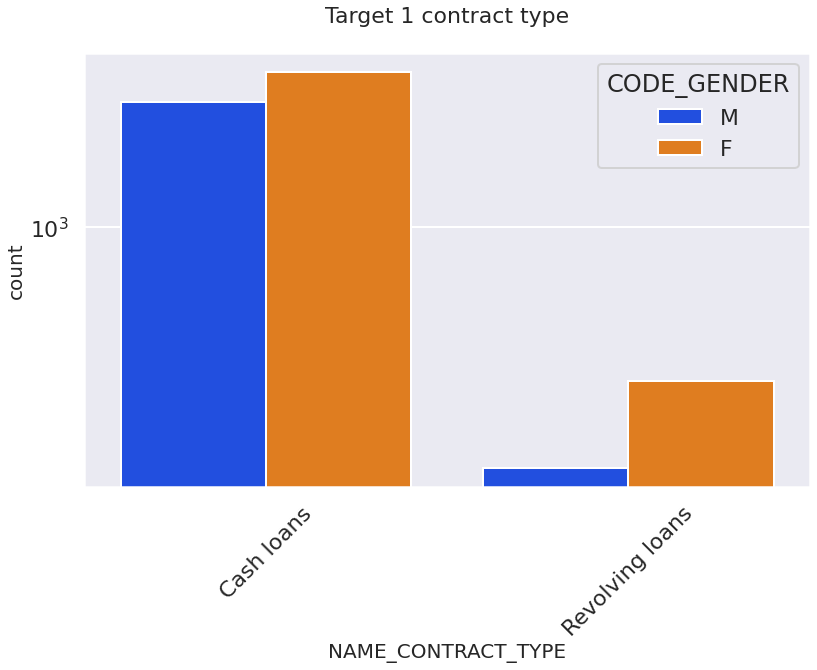

In [45]:
plotfunc(target1,col='NAME_CONTRACT_TYPE',title='Target 1 contract type',hue='CODE_GENDER')

Points to be concluded from the above graph for target = 1 (Defaulters).

1. Cash Loan contracts have a higher number of credit than revolving loan contracts
2. There is only female revolving loans

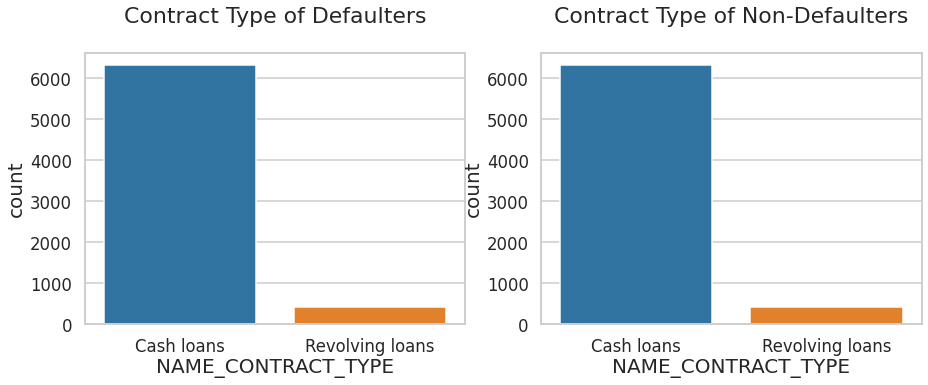

In [163]:
# plotting based on 'NAME_CONTRACT_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = target1)
plt.title('Contract Type of Defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = target1)
plt.title('Contract Type of Non-Defaulters')

plt.show()

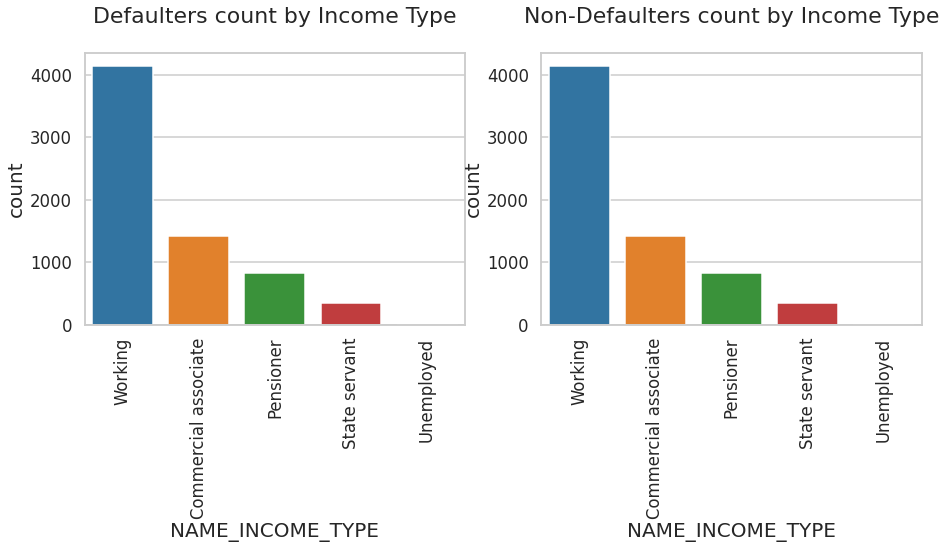

In [165]:
# plotting based on 'NAME_INCOME_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', data = target1)
plt.xticks(rotation = 90)
plt.title('Defaulters count by Income Type')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_INCOME_TYPE', data = target1)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count by Income Type')

plt.show()

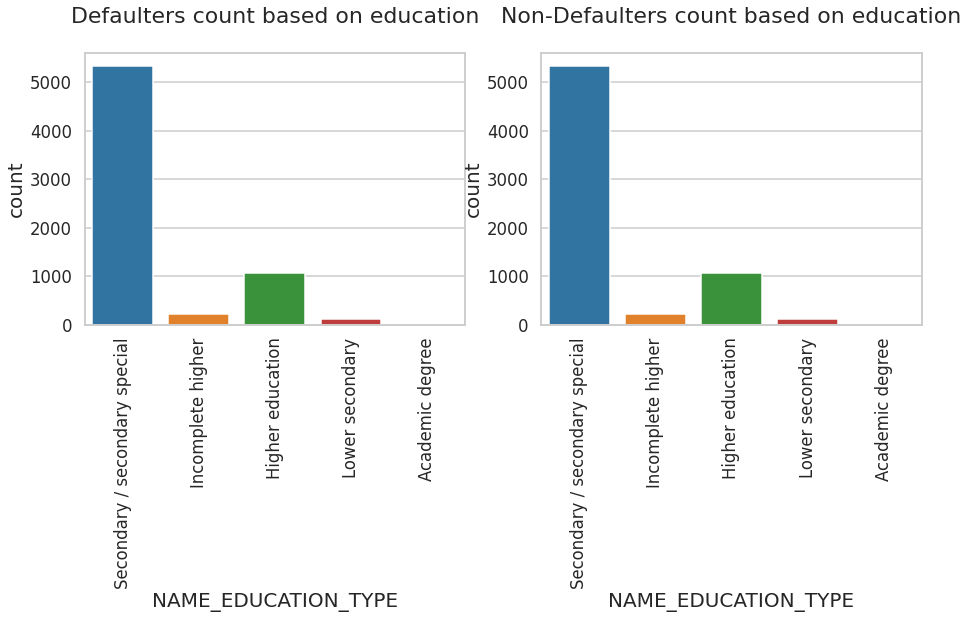

In [166]:
# plotting based on 'NAME_EDUCATION_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = target1)
plt.xticks(rotation = 90)
plt.title('Defaulters count based on education')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = target1)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count based on education')

plt.show()

### **Continuous Univariate Analysis**

In [63]:
# Function for box plot
def cusBoxPlot(data,col,title):
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =data, x=col,orient='v')
    plt.show()

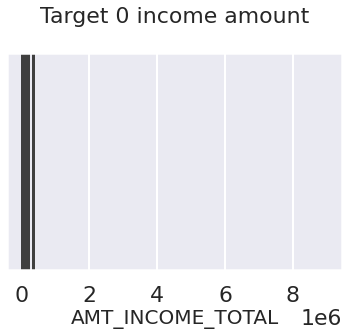

In [64]:
# Distribution of income amount for target0

cusBoxPlot(data=target0,col='AMT_INCOME_TOTAL',title='Target 0 income amount')


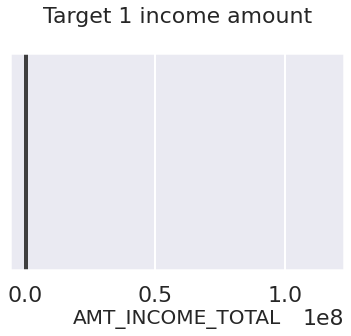

In [65]:
# Distribution of income amount for target1

cusBoxPlot(data=target1,col='AMT_INCOME_TOTAL',title='Target 1 income amount')



**Points to be concluded from the above 2 graph**

1. Outliners are present in both
2. 3rd quartile is narrow for both target 1 and target 0
3. Most of the clients have income in the 1st quartile

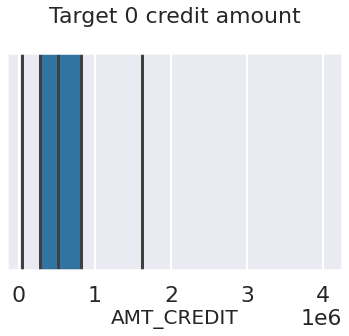

In [53]:
# Disrtibution of credit amount for target 0

cusBoxPlot(data=target0,col='AMT_CREDIT',title='Target 0 credit amount')

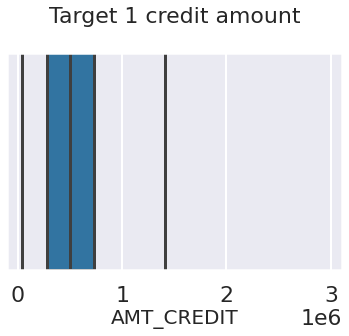

In [54]:
# Disrtibution of credit amount for target 1

cusBoxPlot(data=target1,col='AMT_CREDIT',title='Target 1 credit amount')

**Points to be concluded from the above 2 graph**

1.Outliners are present in both
2. 3rd quartile is narrow for both target 1 and target 0
3. Most of the clients have credit amount in the 1st quartile

### **Bivariate analysis**

**Analysing correlation for numerical columns for both target 0 and 1**


**Plotting Correlation matrix for Target 0 application data**

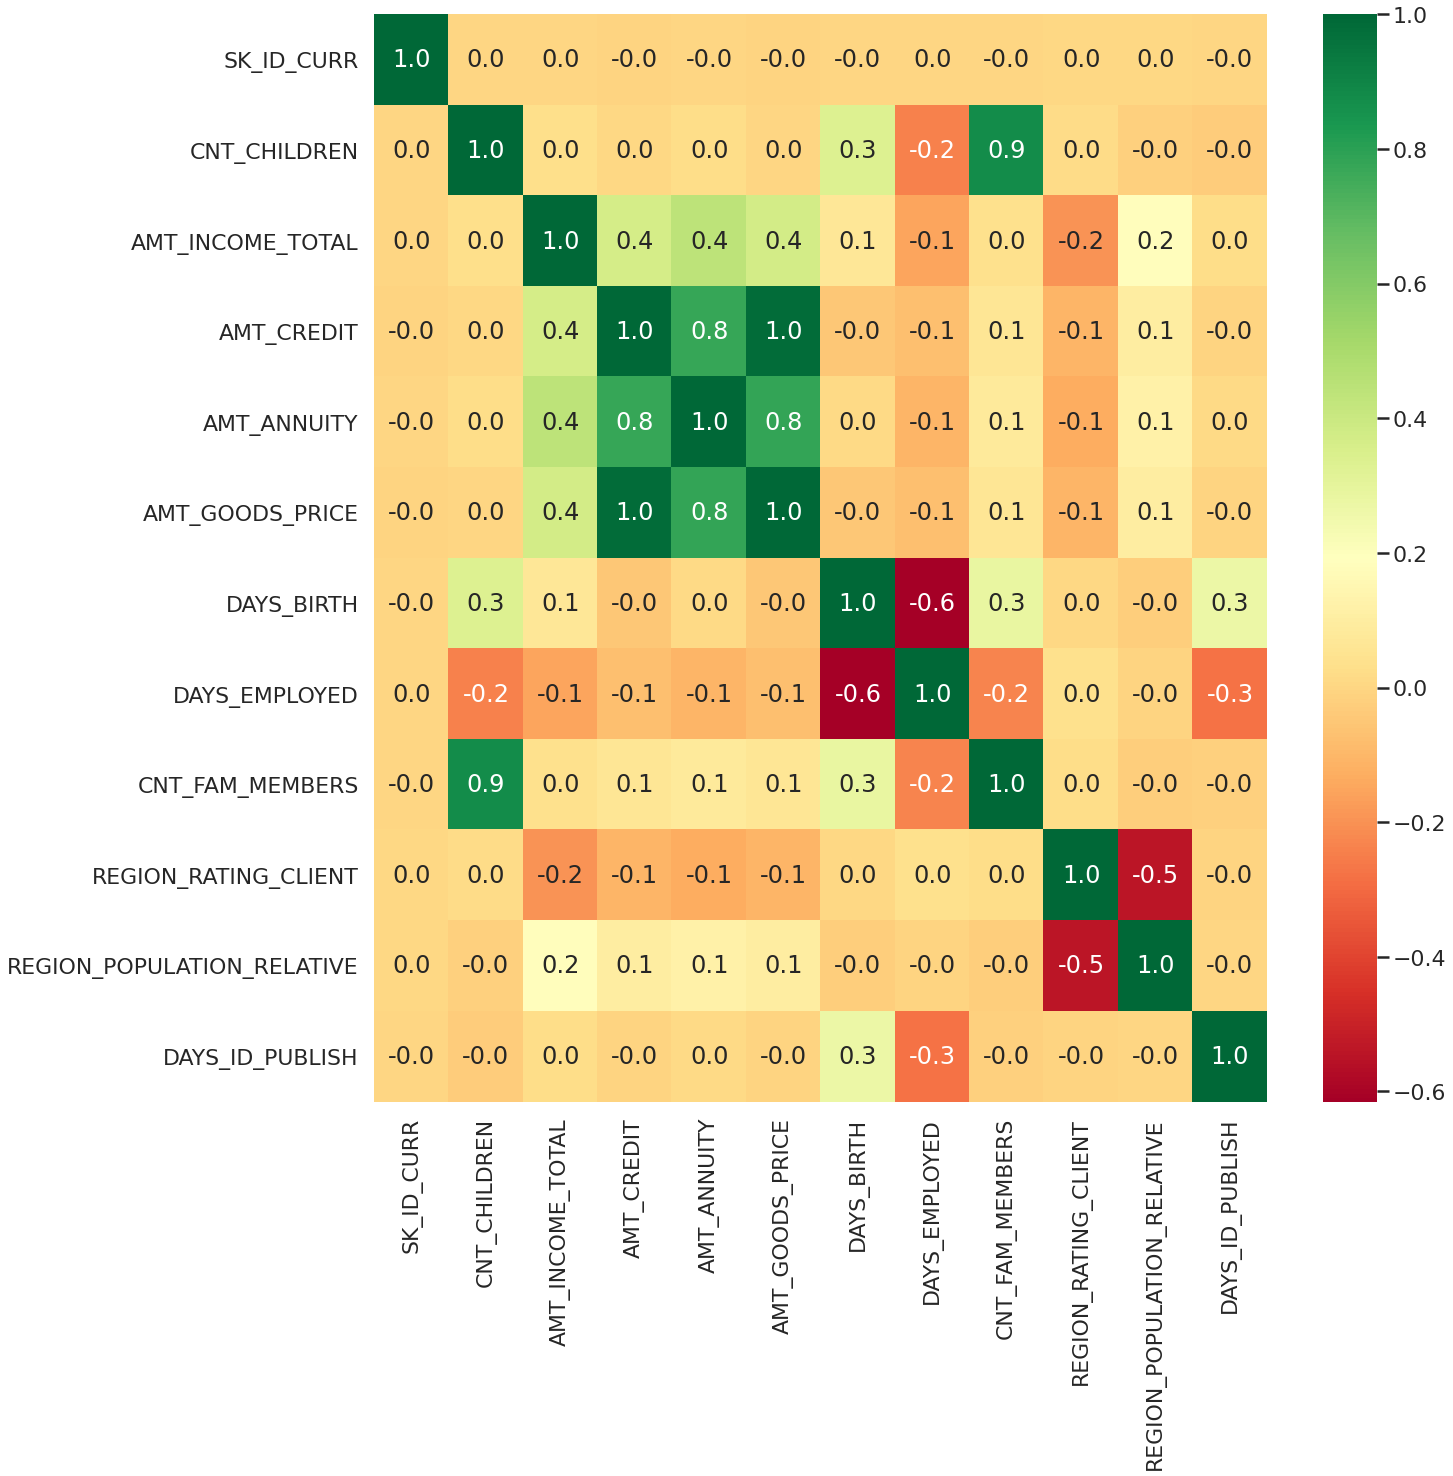

In [69]:
d=target0[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
plt.figure(figsize=(20,20))

sns.heatmap(d.corr(), fmt='.1f', cmap="RdYlGn", annot=True)
plt.show()

**These columns have high correlation values for Target 0.**

"AMT_GOODS_PRICE" and "AMT_CREDIT" "AMT_ANNUITY" and"AMT_CREDIT" "AMT_ANNUITY" and "AMT_GOODS_PRICE" "CNT_FAM_MEMBERS" and "CNT_CHILDREN" "AMT_ANNUITY" and"AMT_INCOME_TOTAL" "AMT_INCOME_TOTAL" and"AMT_GOODS_PRICE"

**Plotting Correlation matrix for Target 1 application data**

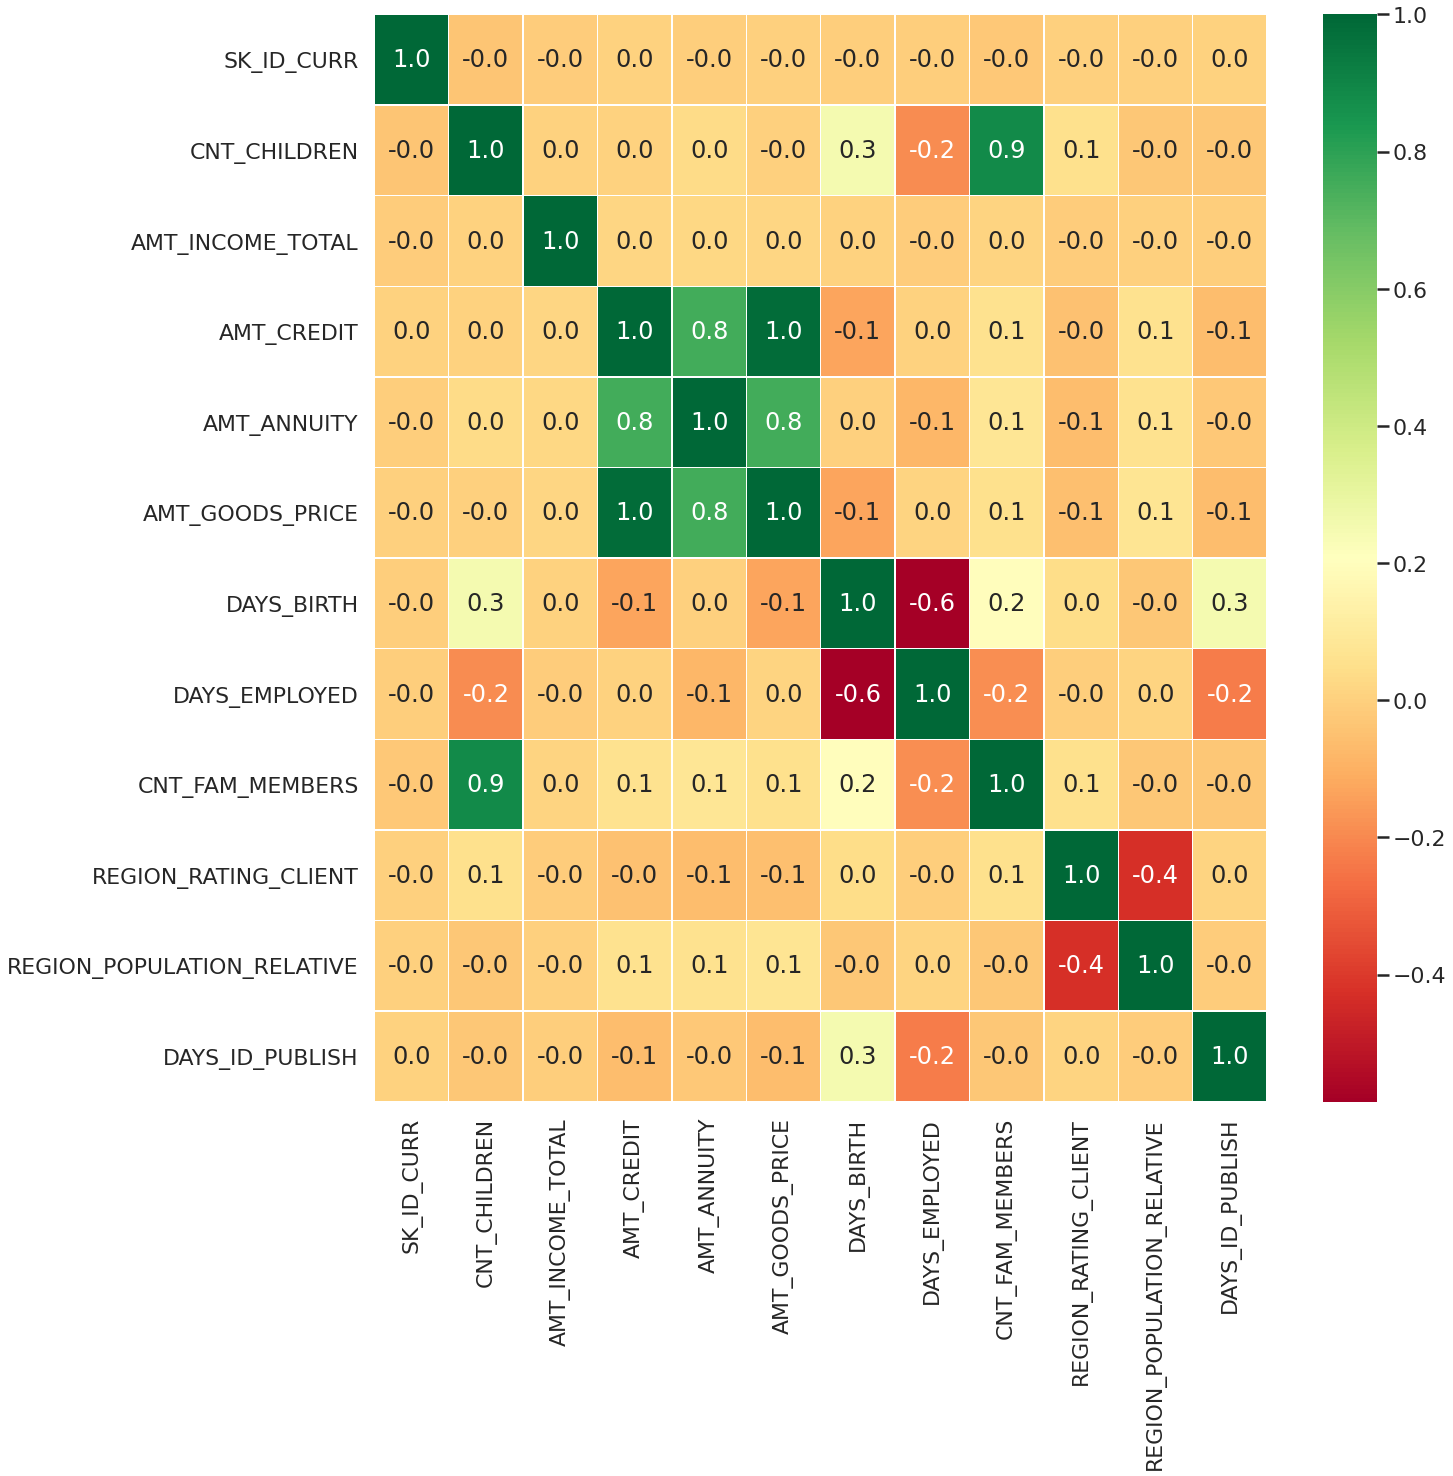

In [68]:
d=target1[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(d.corr(), annot=True, fmt='.1f',cmap="RdYlGn", linewidths=.5, ax=ax)

plt.show()

**Both for Target 0 and Target 1 these columns have high correlation values.**

"AMT_GOODS_PRICE" and "AMT_CREDIT" "AMT_ANNUITY" and "AMT_CREDIT" "AMT_ANNUITY" and "AMT_GOODS_PRICE" "CNT_FAM_MEMBERS" and "CNT_CHILDREN" "AMT_ANNUITY" and "AMT_INCOME_TOTAL" "AMT_INCOME_TOTAL" and "AMT_GOODS_PRICE"

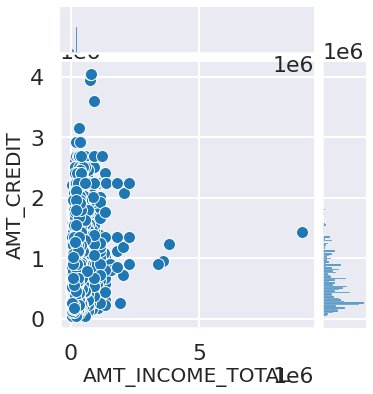

In [70]:
#ploting income vs credit for target 0

sns.jointplot('AMT_INCOME_TOTAL', 'AMT_CREDIT', target0)
plt.show()

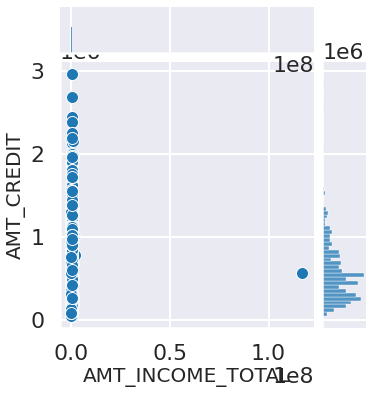

In [71]:
#ploting income vs credit for target 1
sns.jointplot('AMT_INCOME_TOTAL', 'AMT_CREDIT', target1)
plt.show()

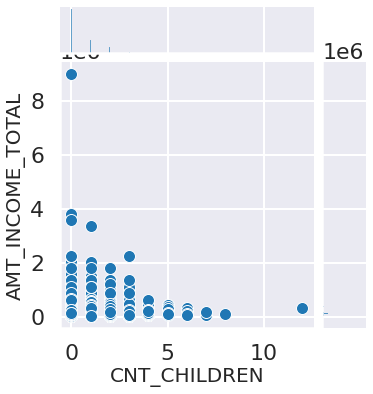

In [72]:
sns.jointplot('CNT_CHILDREN', 'AMT_INCOME_TOTAL', target0)
plt.show()

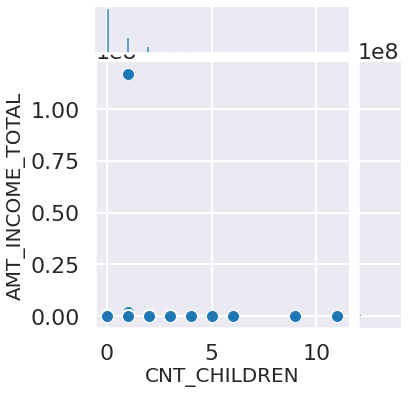

In [73]:
sns.jointplot('CNT_CHILDREN', 'AMT_INCOME_TOTAL', target1)
plt.show()

### 1. Analysis of Credit amount with respect to Education status

Text(0.5, 1.0, 'Credit amount vs Education Status for Traget 0')

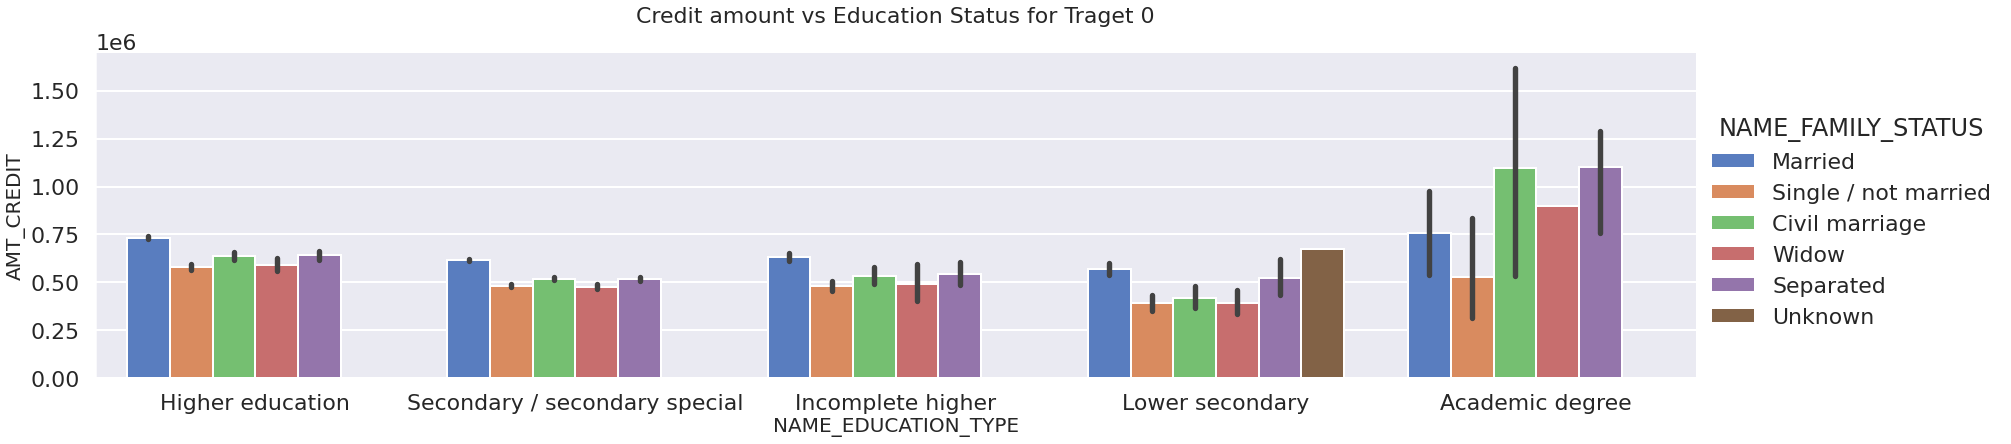

In [75]:
sns.catplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=6,aspect=4, kind="bar", palette="muted")
plt.title('Credit amount vs Education Status for Traget 0')
#plt.show()

**Points to be concluded from the above graph for target = 0 (Non-Defaulters).**

1. Customers holding academic degree have greater credit amount, Civil marriage segment being the highest among them.
2. Lower educated customers tends to have lower credit amount, Widows being the lowest among them
3. Married customers in almost all education segment except lower secondary and academic degrees have a higher credit amount.

Text(0.5, 1.0, 'Credit amount vs Education Status for Traget 1')

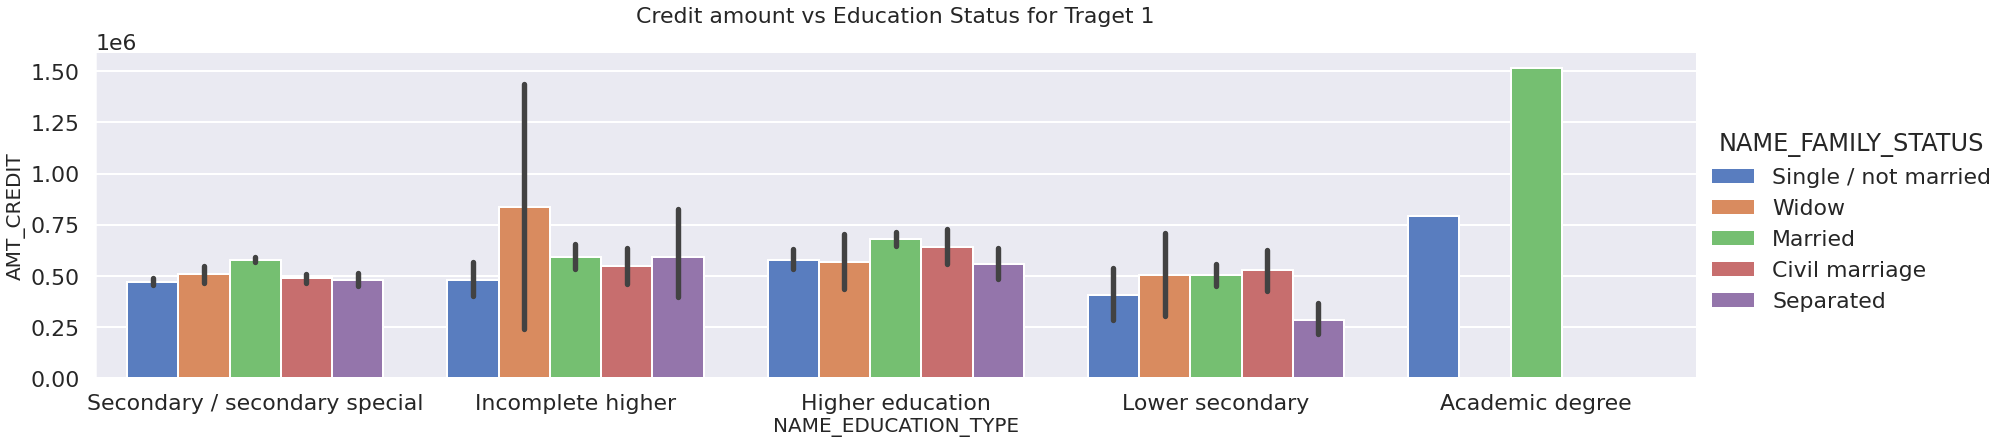

In [76]:
sns.catplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=6,aspect=4, kind="bar", palette="muted")
plt.title('Credit amount vs Education Status for Traget 1')

**Points to be concluded from the above graph for target = 1 (Defaulters).**

1. Married Academic degree holding customers generally have a higher credit amount and so their defaulting rate is also high
2. Accross all education segment married customer tends to have higher credit amount
3. Customers holding lower eductation tends to have a lower credit amount
4. Single and Married are the only 2 family types present in academic degree .

### 2. Analysis of Income amount with respect to Education Status

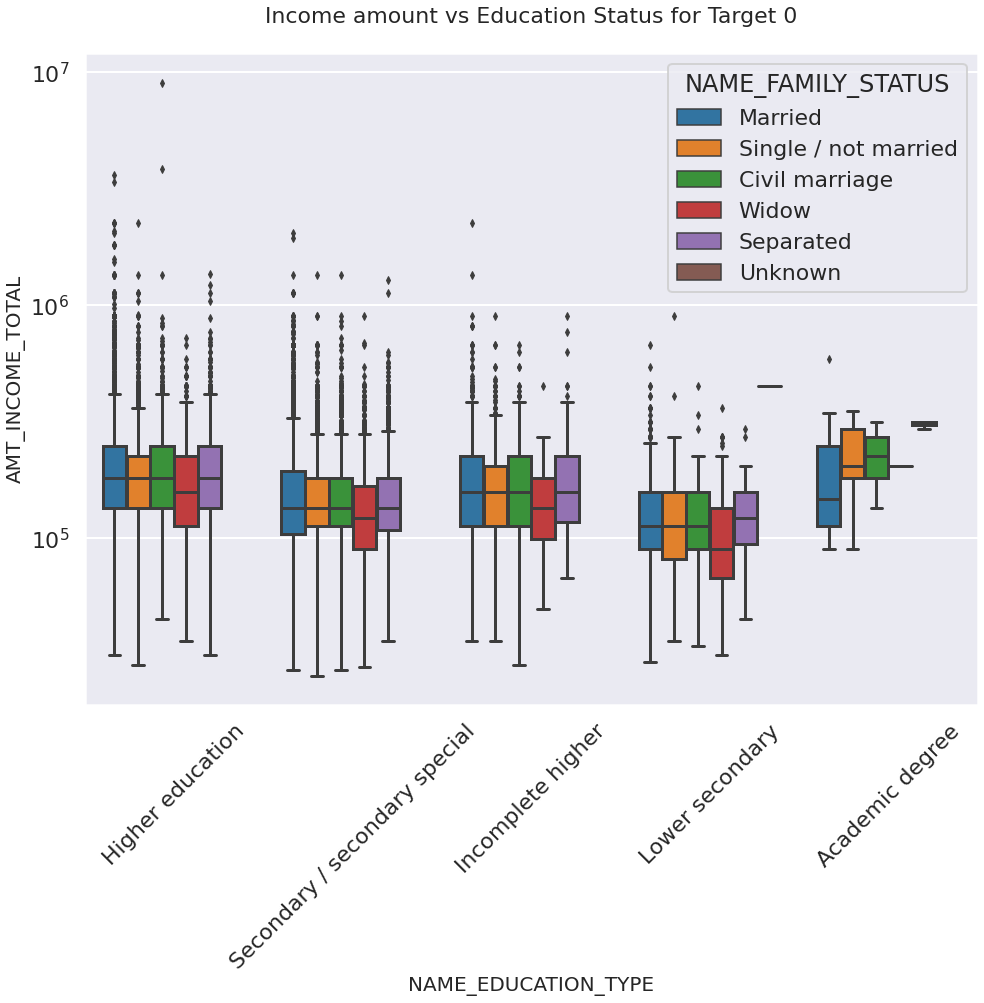

In [77]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for Target 0')
plt.show()


**Points to be concluded from the above graph for target = 0 (Non-Defaulters).**

1. For Education type 'Higher education' the income amount mean is mostly equal with family status. It does contain many outliers.
2. Less outlier are having for Academic degree but they are having the income amount is little higher that Higher education.
3. Lower secondary of civil marriage family status are have less income amount than others.

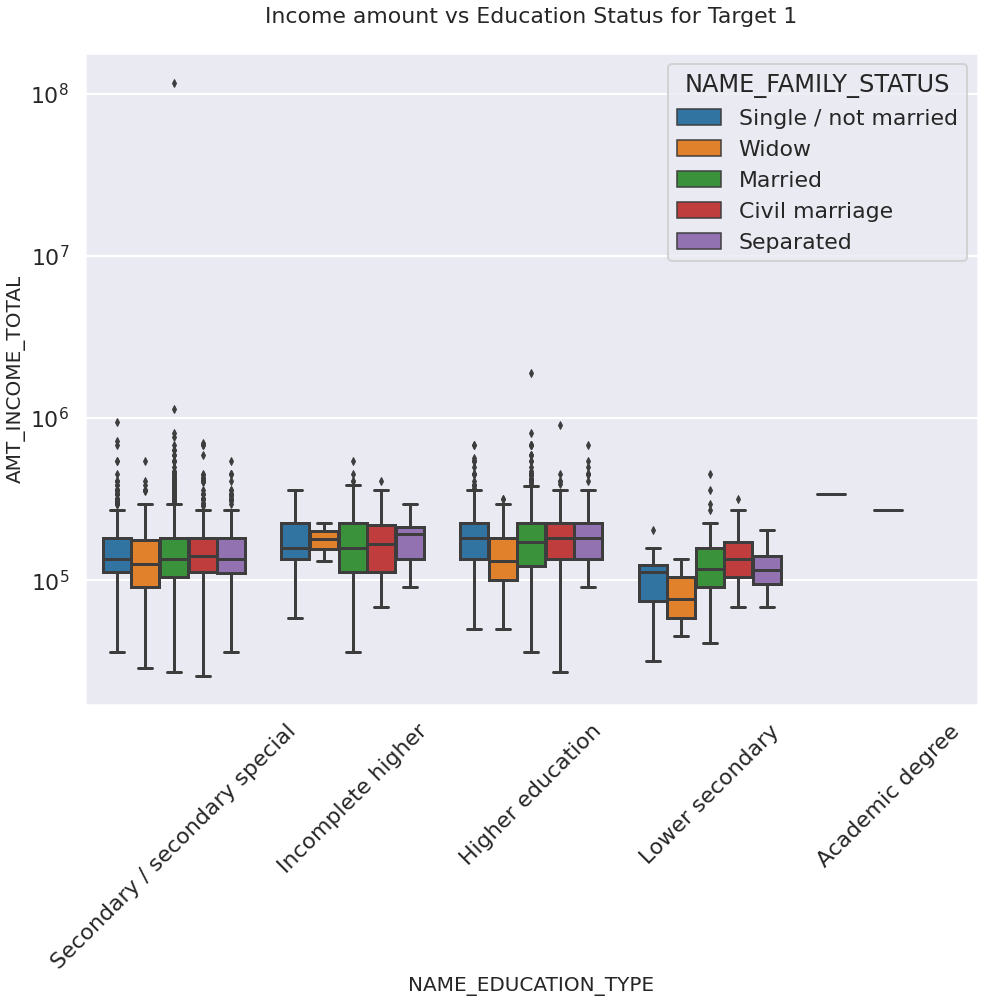

In [78]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for Target 1')
plt.show()


**Points to be concluded from the above graph for target = 1 (Defaulters).**

1. Have some similarity with Target0, From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status.
2. No outlier for Academic degree but there income amount is little higher that Higher education.
3. Lower secondary are have less income amount than others.

In [80]:
# Reading the dataset of previous application

from google.colab import files
uploaded = files.upload()


Saving previous_application.csv to previous_application.csv


In [147]:
df1 = pd.read_csv('previous_application.csv')

In [104]:
# Cleaning the missing data
# listing the null values columns having more than 30%

# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol1=df1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [105]:
# Removing those 15 columns

emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
df1.drop(labels=emptycol1,axis=1,inplace=True)

df1.shape

(1670214, 22)

In [106]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(69635, 22)

In [150]:
# selecting columns from the application data frame to merge
cols = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'DAYS_BIRTH']
application_sub = data[cols]
application_sub.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH
0,100002,1,M,Secondary / secondary special,Single / not married,-9461
1,100003,0,F,Higher education,Married,-16765
2,100004,0,M,Secondary / secondary special,Single / not married,-19046
3,100006,0,F,Secondary / secondary special,Civil marriage,-19005
4,100007,0,M,Secondary / secondary special,Single / not married,-19932


In [152]:
# Now merging the Application dataset with previous appliaction dataset

# merging previous application data with the subset of the application data frame
merged = pd.merge(df1,application_sub, on='SK_ID_CURR', how='left')
merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0.0,F,Secondary / secondary special,Civil marriage,-21335.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,0.0,F,Secondary / secondary special,Married,-10541.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,0.0,M,Secondary / secondary special,Married,-22163.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# checking for the null value column wise
merged.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [154]:

#removing the rows where TARGET column has null value due to left join
merged = merged[~np.isnan(merged['TARGET'])]


In [114]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START_PREV', 'HOUR_APPR_PROCESS_START_PREV'],axis=1,inplace=True)

**Univariate Analysis on categorical columns**

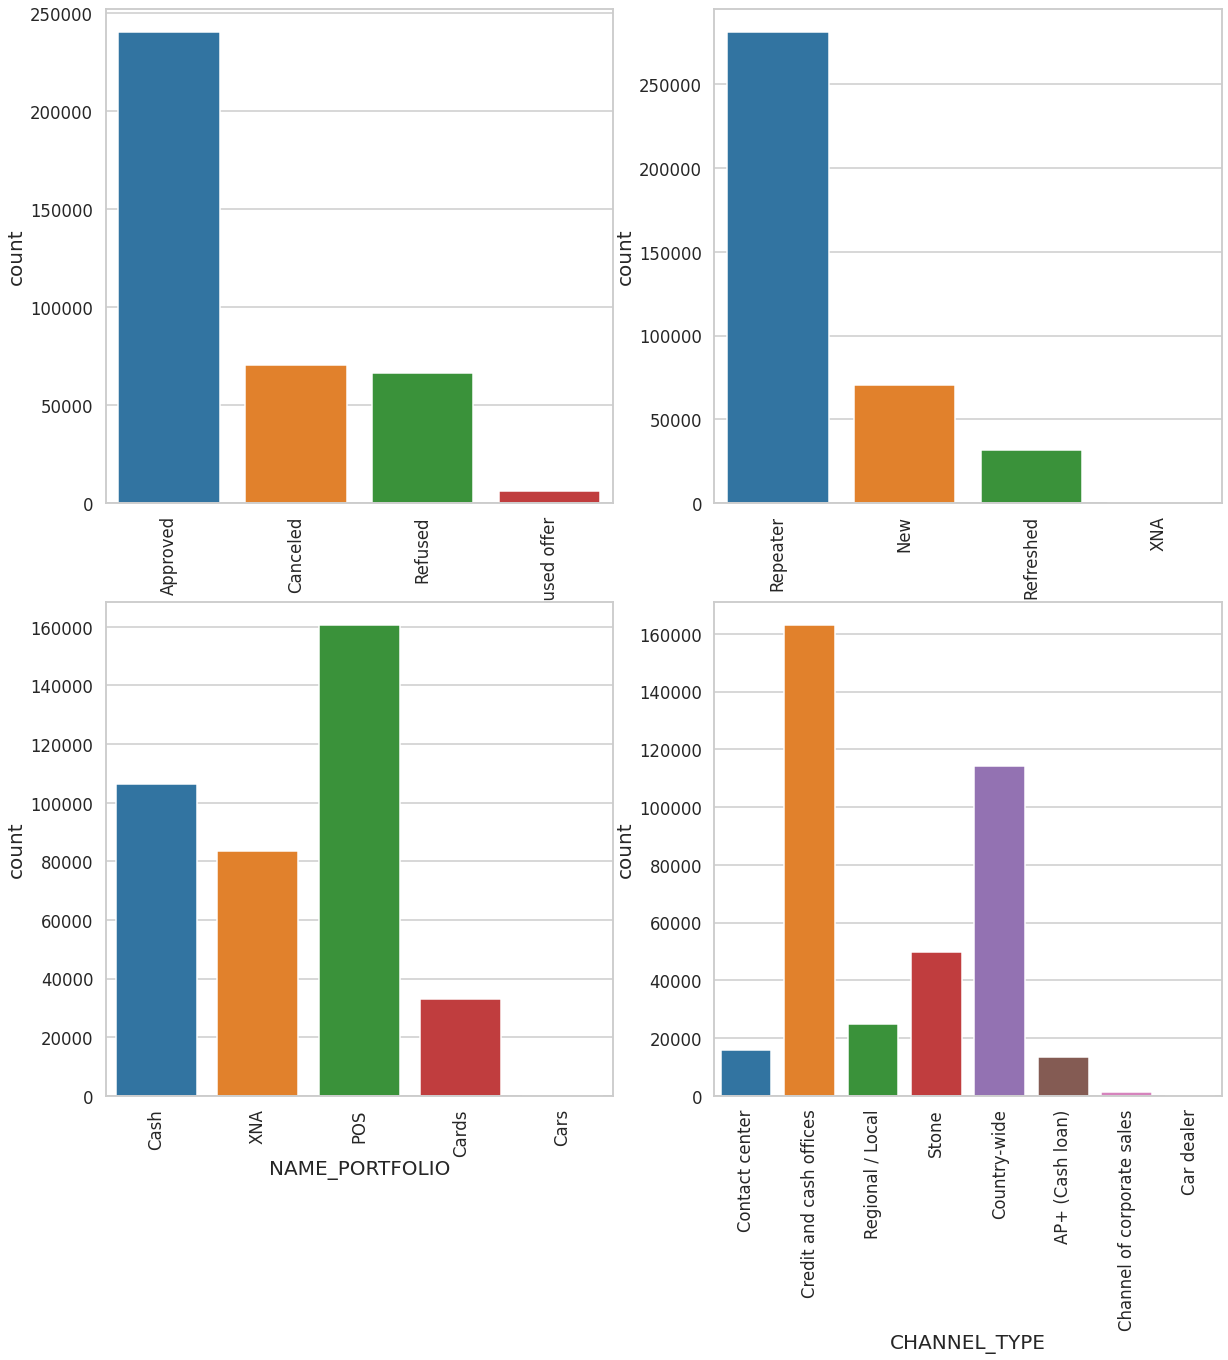

In [155]:
#plotting count plot for categorical columns
categorical = ['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE']
plt.figure(figsize = (20,20))
i = 1
for col in categorical:
    plt.subplot(2,2,i)
    sns.countplot(x = col , data = merged)
    plt.xticks(rotation = 90)
    i += 1
plt.show()

**Analysis**

1. Approved loan status is huge than rejected or canceled.
2. Repeater clients are highest in number than new client.
3. POS loans are highest rather than cash loans.
4. Country-wide channel type is the most used channel followed by Credit and cash offers.

**Univariate analysis on continuous columns**

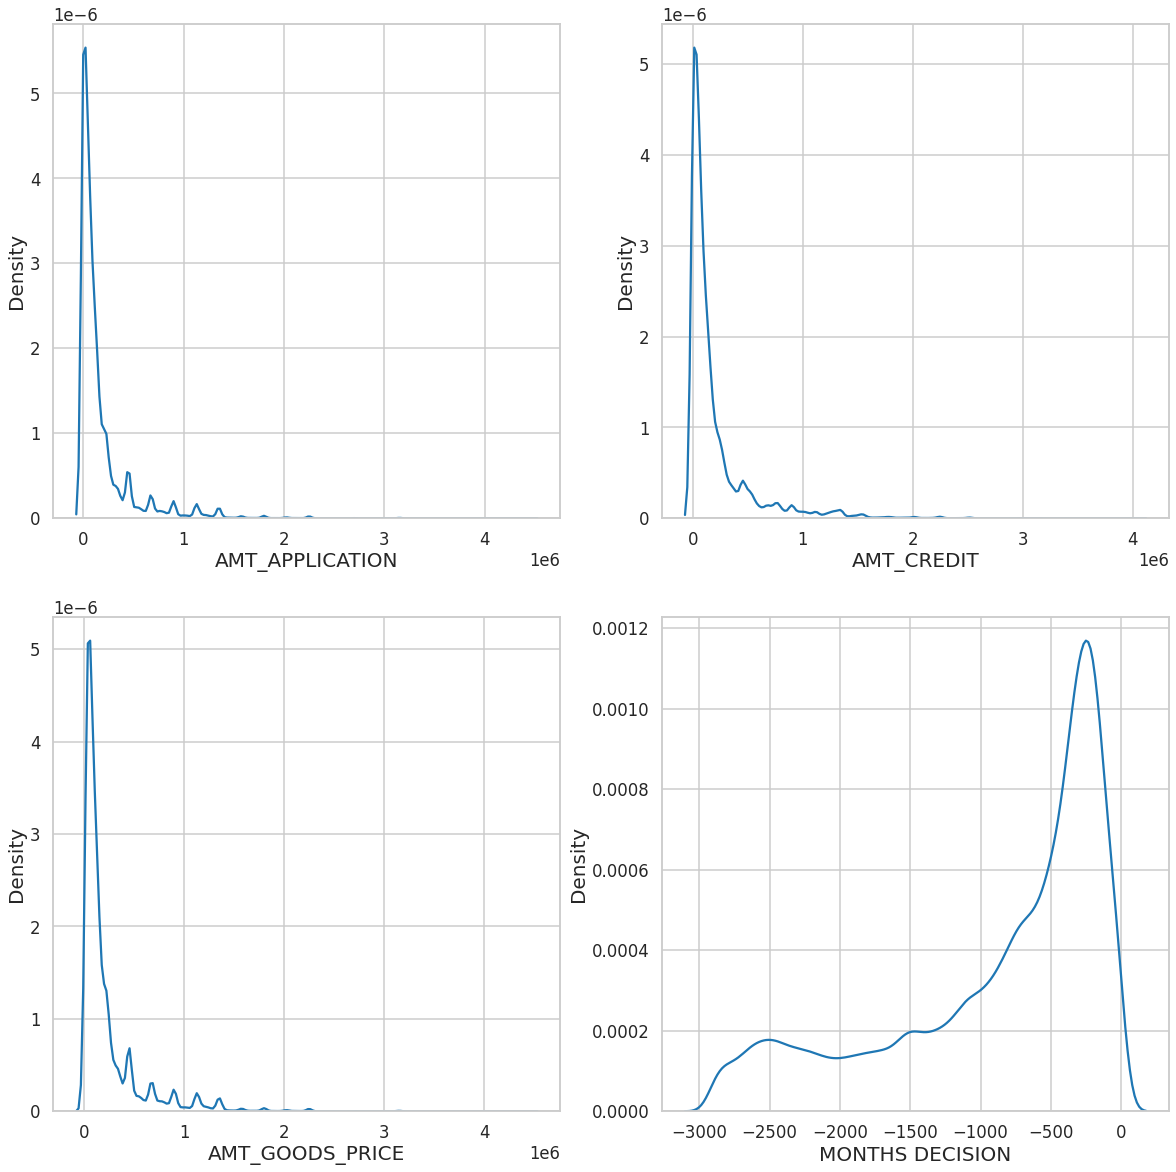

In [156]:
#plotting kde plot for categorical columns
continous = ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION']

plt.figure(figsize = (20,20))
i = 1
for col in continous:
    plt.subplot(2,2,i)
    if col == 'DAYS_DECISION':
        ax = sns.kdeplot(merged[col], label = 'MONTHS DECISION')
        ax.set(xlabel = 'MONTHS DECISION')
    else:
        ax = sns.kdeplot(merged[col])
        ax.set(xlabel = col)
    i += 1
plt.show()

**Analysis**

1. Most of the loan application amount were below 500000, we can see a huge spike around 100000 amount.
2. Amount credited, is also following the pattern of loan application. We already saw that most of the application was approved in previous plots.
3. Amount of the goods price is also following the same distribution like application amount and amount credited. Becasue, based on the price of the goods, the loan was approved and amount was credited.
4. Most of the applications decision took around 10 to 30 months.

**Bivariate analysis**

In [157]:
subset = merged[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'CNT_PAYMENT', 'DAYS_BIRTH']]

subset.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,CNT_PAYMENT,DAYS_BIRTH
1,25188.615,607500.0,679671.0,607500.0,-164,36.0,-21335.0
2,15060.735,112500.0,136444.5,112500.0,-301,12.0,-10541.0
3,47041.335,450000.0,470790.0,450000.0,-512,12.0,-22163.0
6,NaN,0.0,0.0,NaN,-14,NaN,-21503.0
11,13832.775,211500.0,246397.5,211500.0,-815,30.0,-23338.0


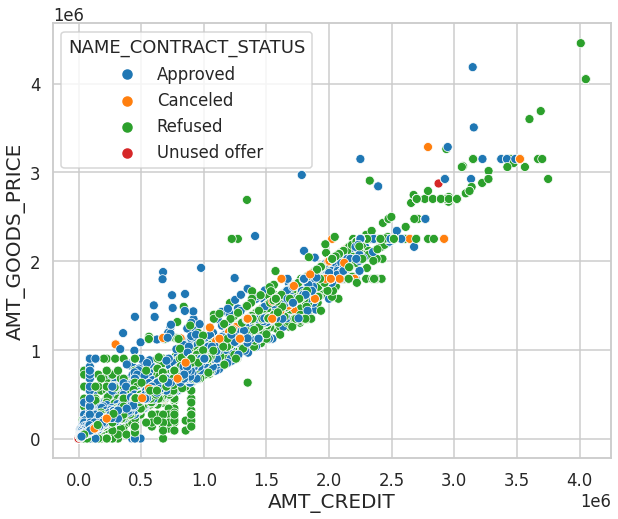

In [158]:

plt.figure(figsize = (10,8))
sns.scatterplot('AMT_CREDIT', 'AMT_GOODS_PRICE', hue='NAME_CONTRACT_STATUS', data = merged)
plt.show()

**Analysis**

AMT_GOODS_PRICE and AMT_CREDIT are posotively correlated and mostly concentrated near the lower region. High AMT_CREDIT loans are most likely to be refused.

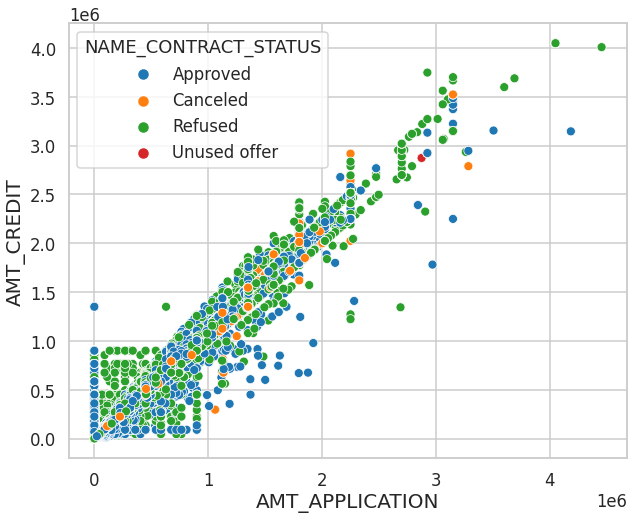

In [159]:
plt.figure(figsize = (10,8))
sns.scatterplot('AMT_APPLICATION', 'AMT_CREDIT', hue='NAME_CONTRACT_STATUS', data = merged)
plt.show()

**Analysis**

Credit amount and the application is highly correlated.

**Bivariate analysis on categorical columns**

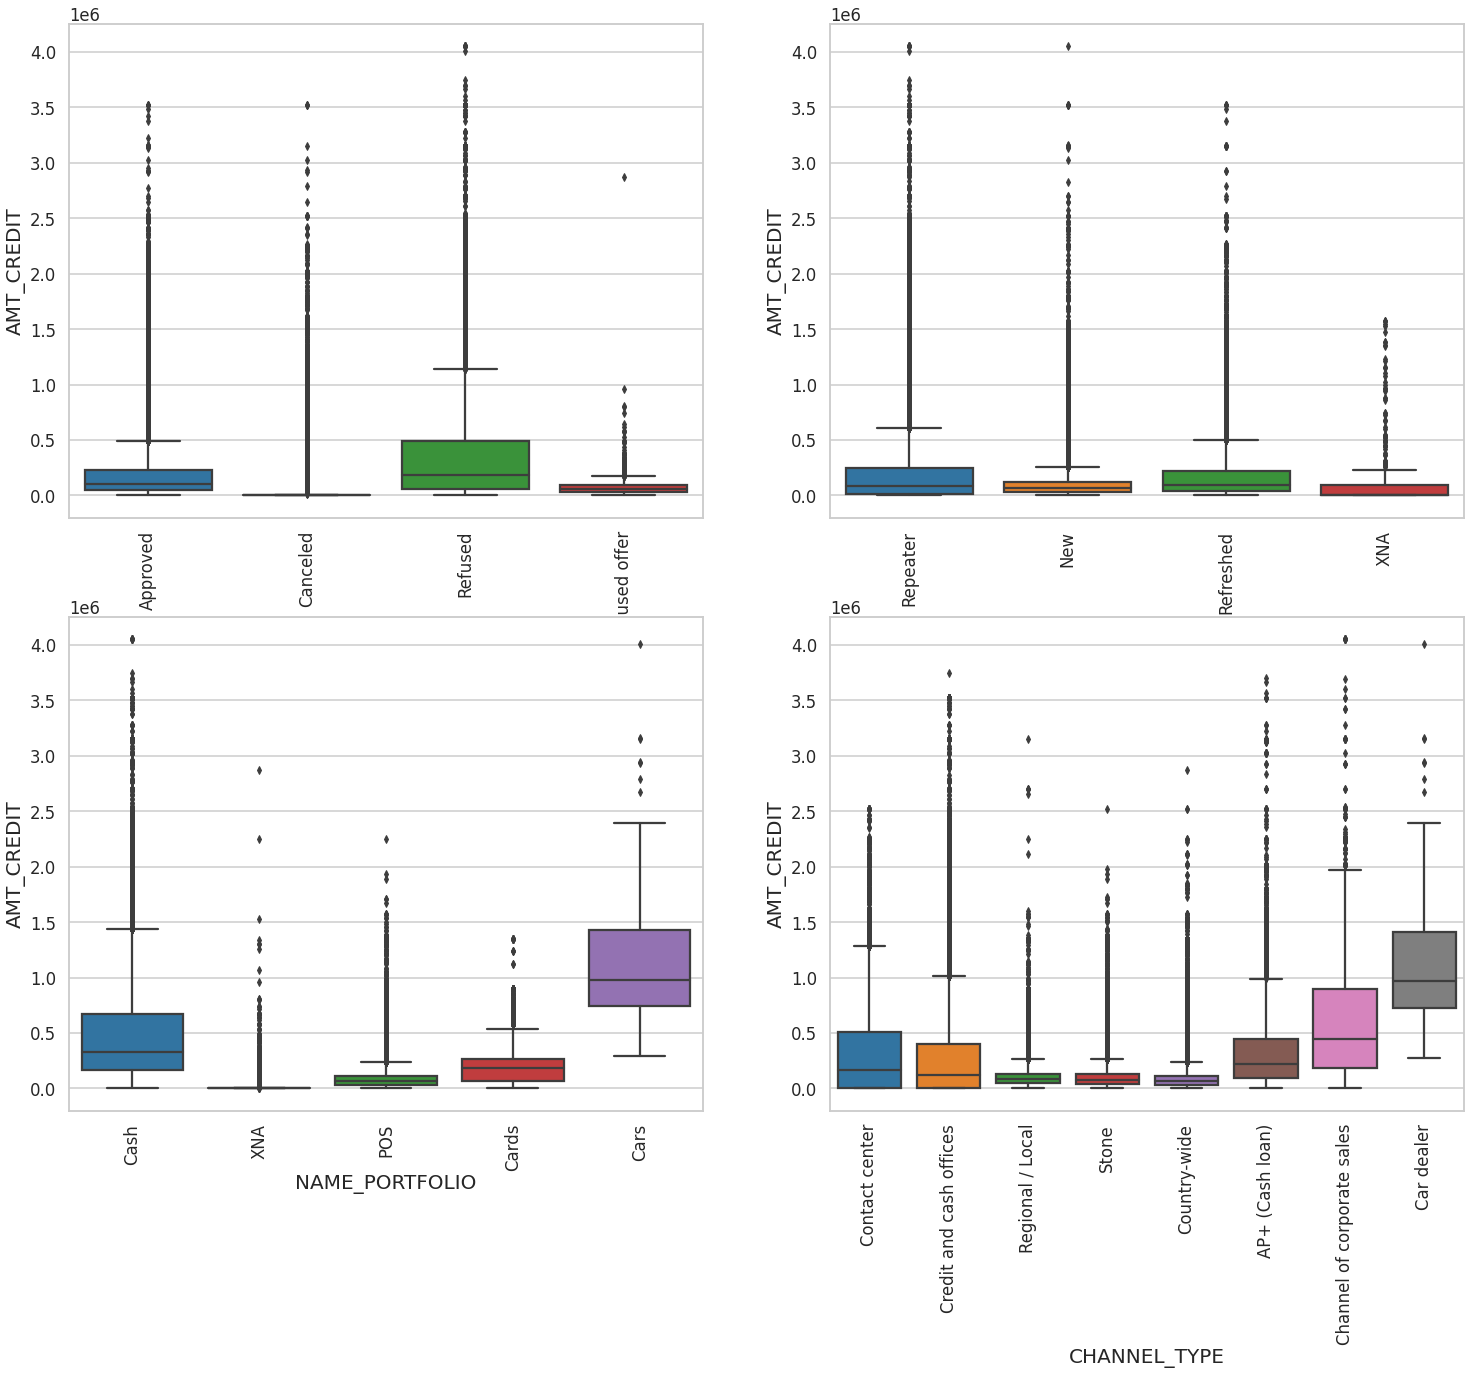

In [160]:
plt.figure(figsize=(25,20))
i=1
for category in categorical:
    ax = plt.subplot(2,2,i)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=merged)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    i += 1
plt.show()


**Analysis**

1. Most of the amount credit was cancelled in status
2. Repeater client got more loan credit
3. Cash loan got more credited.
4. Through the contact center channel, more loan got credited.

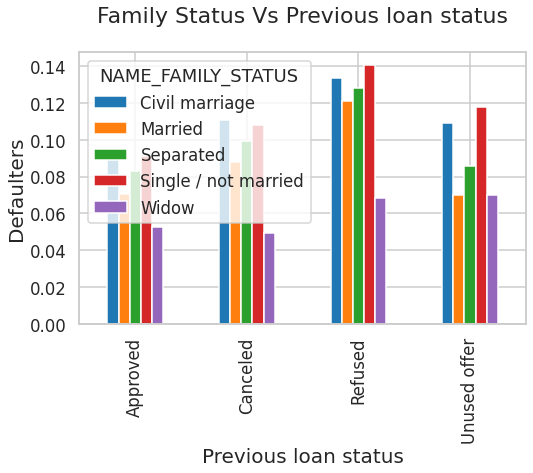

In [162]:
merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_FAMILY_STATUS',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Family Status Vs Previous loan status')
plt.show()

**Analysis**

1. Client who did civil marriage with previously unused loan offers ar more defaulted currently.

2. Edducatuion status Vs Previous loan status

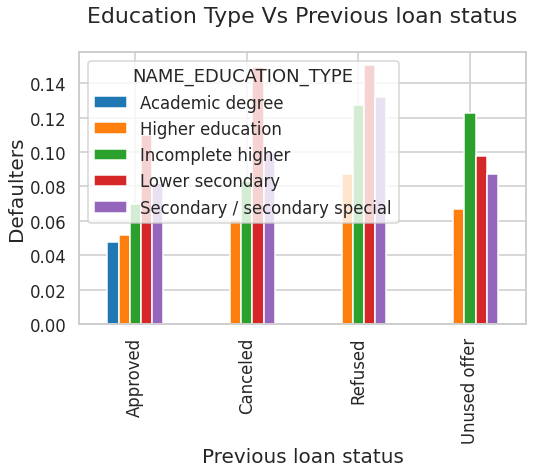

In [161]:
merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_EDUCATION_TYPE',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Education Type Vs Previous loan status')
plt.show()

**Analysis**

Previously refused people with lower secondary education are more defaulted in current application.